# Simplificação de Cores em Imagens com KMeans e HSV
Este notebook apresenta o processo de simplificação de cores de uma imagem utilizando KMeans e o espaço de cor HSV.
1. Imagem original (RGB 8 bits)
2. Conversão para HSV e análise do canal Hue
3. Preparação dos pixels para o KMeans
4. Gráfico do cotovelo para escolha do melhor K
5. Definição do valor de K
6. Execução do KMeans com K escolhido
7. Visualização das cores dominantes
8. Reconstrução e exibição da imagem simplificada
9. Comparação lado a lado imagem original e simplificada
10. Apresentação dos resultados

# Simplificação de Cores em Imagens com KMeans e HSV
Este notebook apresenta o processo de simplificação de cores de uma imagem utilizando KMeans e o espaço de cor HSV.
- Imagem original (RGB 8 bits)
- Conversão para HSV e análise do canal Hue
- Gráfico do cotovelo para escolha do melhor K
- Imagem final simplificada
- Comparação visual e apresentação dos resultados

In [20]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from sklearn.cluster import KMeans

In [21]:
im = cv2.imread('/home/netorapg/projects/ML/30-out/cidade-proibida-na-china.jpg')

if im is None:
	print("Error: Image not found or path is incorrect.")
else:
	im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
	original_shape = im.shape 
	print(im.shape)

(768, 1365, 3)


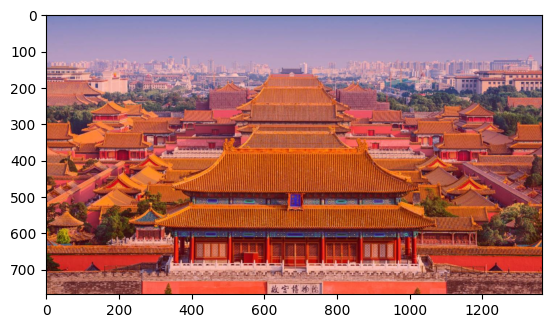

In [22]:
plt.imshow(im)
plt.show()

Total de valores únicos de Hue: 176


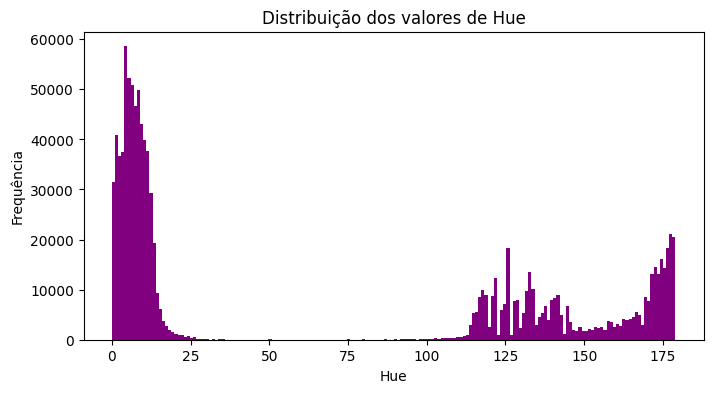

In [23]:
# 2. Converter para HSV e analisar o canal Hue
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
hue_channel = im_hsv[:,:,0]
unique_hues = np.unique(hue_channel)
print(f'Total de valores únicos de Hue: {len(unique_hues)}')
plt.figure(figsize=(8,4))
plt.hist(hue_channel.flatten(), bins=180, color='purple')
plt.title('Distribuição dos valores de Hue')
plt.xlabel('Hue')
plt.ylabel('Frequência')
plt.show()

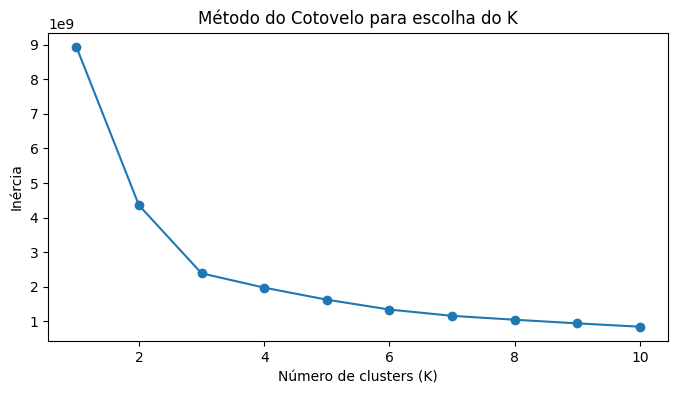

In [24]:
# 3. Gráfico do cotovelo para escolha do melhor K
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(all_pixels)
    inertias.append(km.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K_range, inertias, marker='o')
plt.title('Método do Cotovelo para escolha do K')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inércia')
plt.show()

In [25]:
# Valor de K escolhido pelo método do cotovelo
dominant_colors = 4

In [26]:
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


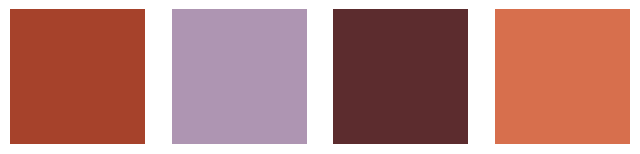

In [27]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
i = 1
plt.figure(0, figsize=(8,2))
colors = []
for each_col in centers:
    plt.subplot(1, dominant_colors, i)
    plt.axis("off")
    i += 1
    colors.append(each_col)
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

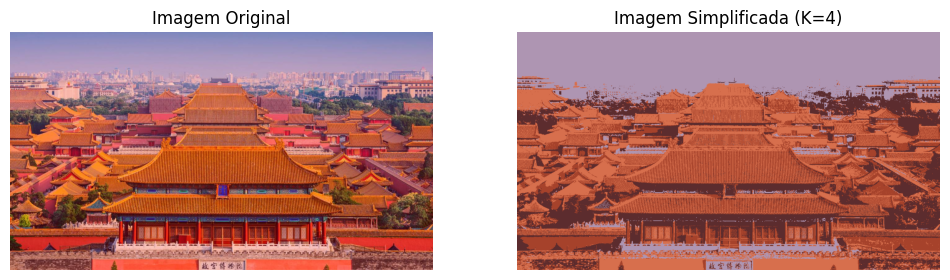

In [28]:
new_img = np.zeros((original_shape[0] * original_shape[1], 3), dtype='uint8')
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape(original_shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Imagem Original')
plt.imshow(im)
plt.axis('off')
plt.subplot(1,2,2)
plt.title(f'Imagem Simplificada (K={dominant_colors})')
plt.imshow(new_img)
plt.axis('off')
plt.show()